In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio


# Load image

'LOCATION' is heuristic for loading the data based in folder name. In my case, the data is for Honkkong location and I named the subfolder containing the data 'Hongkong'

In [2]:
LOCATION = 'Hongkong'

# Read data

In [3]:
redImage = mpimg.imread(f"./data/{LOCATION}/B4.TIF")
nirImage = mpimg.imread(f"./data/{LOCATION}/B5.TIF")
tempImage10 = mpimg.imread(f"./data/{LOCATION}/B10.TIF")
tempImage11 = mpimg.imread(f"./data/{LOCATION}/B11.TIF")

In [4]:
tempImage10 = tempImage10.astype(float)
tempImage11 = tempImage11.astype(float)
mask = tempImage10 == 0
tempImage10[mask] = np.nan
tempImage11[mask] = np.nan

In [9]:
from pylandtemp import ndvi, split_window

In [6]:
nirImage = nirImage.astype('float')
redImage = redImage.astype('float')
nirImage[nirImage > 65535] = np.nan
redImage[redImage > 65535] = np.nan
nirImage[nirImage < 0] = np.nan
redImage[redImage < 0] = np.nan

# Compute NDVI

In [7]:
mask = redImage == 0
ndviImage = ndvi(nirImage, redImage, mask=mask)

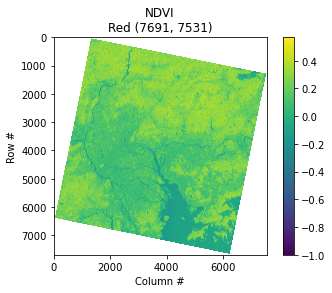

In [8]:
plt.imshow(ndviImage)
plt.colorbar()
plt.title('{}\nRed {}'.format('NDVI', ndviImage.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# Compute Land surface temperature

### Jiminez munoz et al method

In [15]:
method = 'jiminez-munoz'

lst_image_split_window = split_window(
    tempImage10, 
    tempImage11, 
    redImage, 
    nirImage, 
    lst_method=method, 
    emissivity_method='avdan',
    unit='celcius'
)

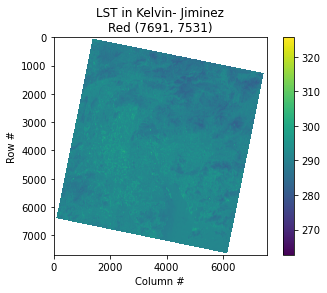

In [17]:
plt.imshow(lst_image_split_window)
plt.colorbar()
plt.title('{}\nRed {}'.format('LST in Kelvin- Jiminez', tempImage10.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

### Kerr  method

In [20]:
method = 'kerr'

lst_image_split_window = split_window(
    tempImage10, 
    tempImage11, 
    redImage, 
    nirImage, 
    lst_method=method, 
    emissivity_method='avdan',
    unit='celcius'
)

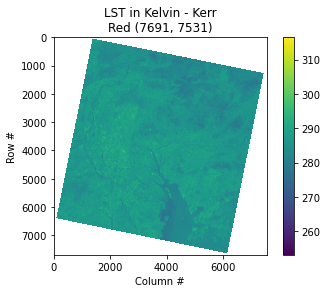

In [19]:
plt.imshow(lst_image_split_window)
plt.colorbar()
plt.title('{}\nRed {}'.format('LST in Kelvin - Kerr', tempImage10.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()